# CO2 Emission in Vehicles 

## Table of Contents
1. **[The Data and the Problem](#problem)**
2. **[Basic Data Exploration](#explore)**
3. **[Exploratory Data Analysis - Univariate analysis and relationship with Target](#eda)**
4. **[Continuing EDA with Feature Engineering](#feature)**
5. **[Encoding](#encode)**
6. **[Scaling](#scale)**
7. **[Linear Regression - Modelling and Fine Tuning](#model)**
    - 7.1 - **[Model 1 - SLR Model with Fuel Consumption](#m1)**
    - 7.2 - **[Model 2 - Fuel Consumption and Engine Size](#m2)**
    - 7.3 - **[Model 3 - Considering Columns using VIF](#m3)**
    - 7.4 - **[Model 4 - All Columns Except Make](#m4)**
        - 7.4.1 - **[4a - OLS](#m4a)**
        - 7.4.2 - **[4b - Recursive Feature Elimination](#m4b)**
        - 7.4.3 - **[4c - Stochastic Gradient Descent](#m4c)**
        - 7.4.4 - **[4d - Forward Selection](#m4d)**
    - 7.5 - **[Model 5 - All Columns including Make - Forward Selection](#m5)**
8. **[The best model and assumptions of Linear Regression](#assumption)**
9. **[Final Impressions](#conclusion)**
10. **[Future Enhancements](#future)**
    

<a id="problem"></a>
# The Data and the Problem

## About the dataset

    The data has been taken from the Canadian Government's official website:
   **https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6**
    
    We took the curated data taken from:
   **https://www.kaggle.com/debajyotipodder/co2-emission-by-vehicles**
    

### Column by Column Overview

   **Make:** The brand of the car
   
   **Model:** Model of the car
   
   **Vehicle Class:** Type of the vehicle
   
   **Engine Size(L):** Size of engine (in Litre)
   
   **Cylinders:** Number of Cylinders
   
   **Transmission:** Transmission type with number of gears
   
   **Fuel Type:** Type of Fuel used
   
   **Fuel Consumption City (L/100 km):** Fuel consumption in city roads (L/100 km)	
   
   **Fuel Consumption Hwy (L/100 km):** Fuel consumption in Highway roads (L/100 km)	
   
   **Fuel Consumption Comb (L/100 km):** The combined fuel consumption (55% city, 45% highway) (L/100 km)
   
   **Fuel Consumption Comb (mpg):** The combined fuel consumption in both city and highway (mpg)
   
    
   **CO2 Emissions(g/km):** (Target Variable) the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving


### Problem Statement

    To build a model to predict the CO2 emissions (g/km) for vehicles from Canada based on their fuel
    consumption and other describing features like Engine Size, Fuel Type Cylinders ,Gears etc.

In [1]:
# Import the libraries
import numpy as np #For numerical Calculations
import pandas as pd # Data Exploration and Wrangling
import seaborn as sns #Visualization
import matplotlib.pyplot as plt #Visualization
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# For modelling 
import statsmodels.api as sm

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Missing Value analysis
import missingno as msno

# Encoding
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.feature_selection import RFE

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

## Import dataset

In [2]:
co2 = pd.read_csv('CO2 Emissions_Canada.csv')
co2.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<a id="explore"></a>
# Basic Data Exploration

### 1. Shape of the data

In [3]:
co2.shape

(7385, 12)

#### Interpretation: 
    There are 7385 observations and 12 columns in this dataset. 
    From the metadata, it is also clear that the target variable is the column CO2 Emissions(g/km). 
    The main task in this dataset is the prediction of CO2 emission by a particular vehicle. 

### 2. Datatype Assignment

In [4]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

#### Interpretation:
    1. At first glance, there are 5 categorical, 6 numerical and 1 numerical target variables. 
    2. There seem to be no null values. This needs to be confirmed. 
#### KeyTakeaways:
    1. The column Cylinders which signifies the number of cylinders in the vehicle is marked as int. 
    It is not clear yet if this assignment is correct or not. It remains to be investigated if this is an ordinally encoded categorical variable, or discrete numerical variable. 
    
    The exploration of the column in detail will reveal the next course of action
    
### 3. Missing Values

    Are there any missing values in the data?
 

<AxesSubplot:>

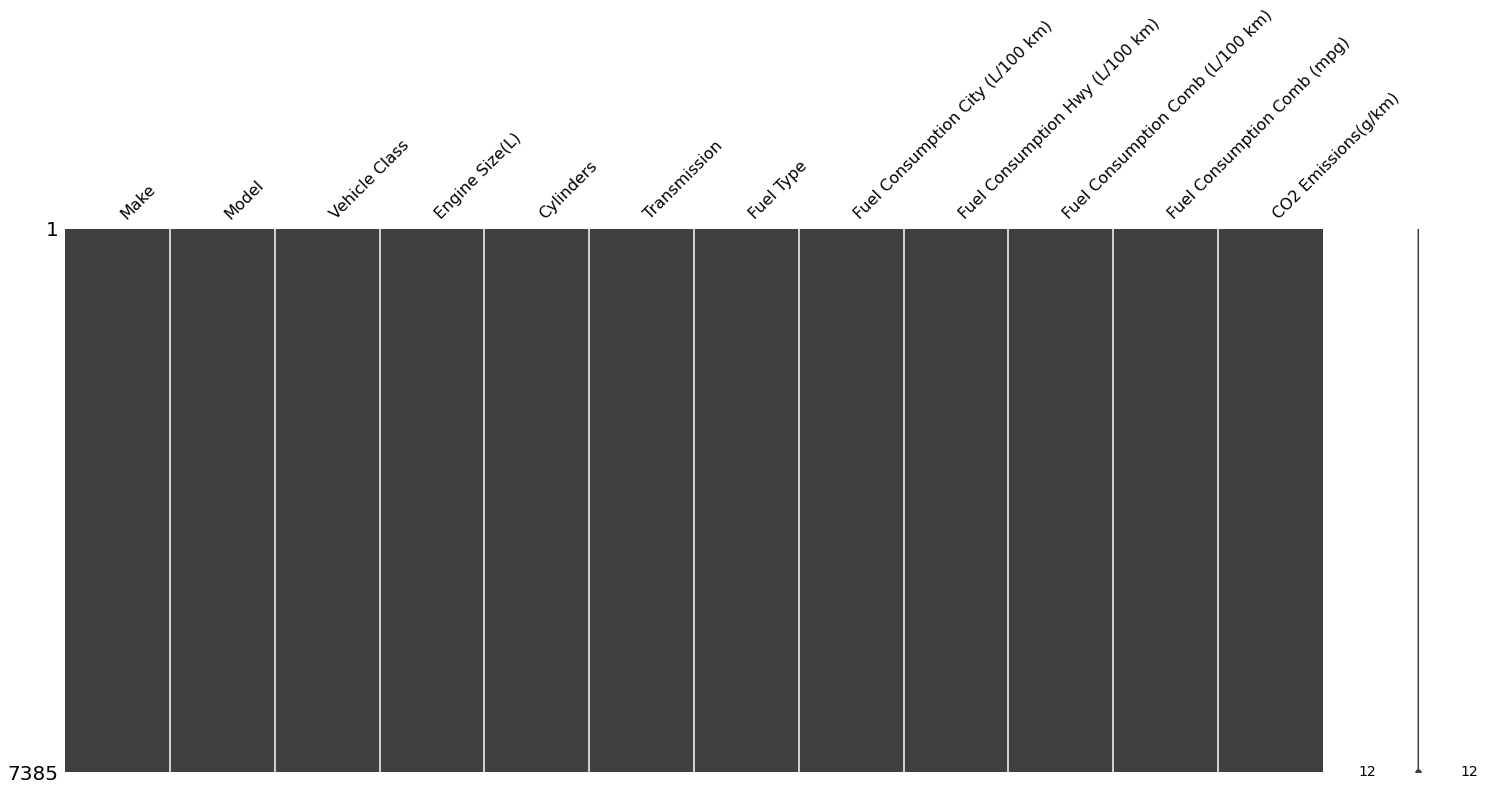

In [8]:
msno.matrix(co2)

    There are no null values in this dataset
    
### Duplicate Records?

In [5]:
co2[co2.duplicated()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [6]:
co2 = co2.drop_duplicates()

In [7]:
co2.shape

(6282, 12)

    We see that all the duplicated records have been removed. 
    But, further explroation reveals that some names in the "Model" column are differently spelt and thus, redundancy in
    records still exists. 
    
    For example: For the brand Bugatti:

In [8]:
co2[co2["Make"] == "BUGATTI"]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522


    These two records are exactly same except for the spellings of Model - CHIRON. 
    
    So, we rectify that by converting all the Model names to Uppercase and then check for duplicates again. 

In [9]:
co2["Model"] = [name.upper() for name in co2["Model"]]
co2.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
# Checking for duplicate rows in the dataset again:
co2[co2.duplicated()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
5457,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,31,210
5461,ACURA,RLX HYBRID,MID-SIZE,3.5,6,AM7,Z,8.4,8.2,8.4,34,196
5466,ALFA ROMEO,4C COUPE,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,197
5467,ALFA ROMEO,4C SPIDER,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,197
5468,ALFA ROMEO,GIULIA,MID-SIZE,2.0,4,A8,Z,10.0,7.2,8.7,32,205
...,...,...,...,...,...,...,...,...,...,...,...,...
6816,FORD,FUSION HYBRID,MID-SIZE,2.0,4,AV,X,5.5,5.7,5.6,50,131
6827,FORD,MUSTANG CONVERTIBLE,SUBCOMPACT,2.3,4,M6,X,11.8,8.4,10.3,27,240
7113,LINCOLN,CONTINENTAL AWD,FULL-SIZE,2.7,6,AS6,X,14.0,9.5,12.0,24,281
7226,NISSAN,ARMADA 4WD,SUV - STANDARD,5.6,8,AS7,X,17.5,12.9,15.4,18,362


    291 rows are found to be duplicated. 
    We have to remove them so as to retain only unique instances. 

In [11]:
co2 = co2.drop_duplicates()
co2.shape

(5991, 12)

    We now have 5991 unique rows and 12 columns. 

In [16]:
# Store to csv to aid in the data exploration process
co2.to_csv('CO2 Emissions - Unique.csv',index=False)

<a id="eda"></a>
# Exploratory Data Analysis - Univariate analysis and relationship with Target

    We take each and every column and analyze its behaviour. 
    If needed, we check its relationship with the target as well.
### a. Make

    This is clearly a categorical variable. 
    Best analyzed via visual methods

In [12]:
make_desc = co2.Make.value_counts().sort_values(ascending = False)
make_desc_labels = make_desc.index

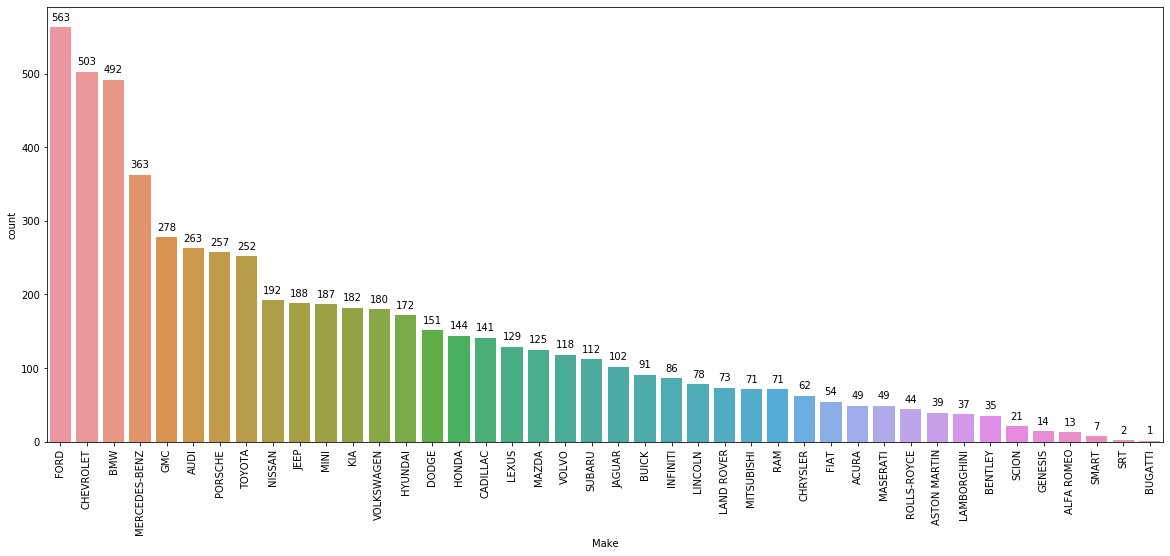

In [13]:
# How many cars of each make are there in this dataset?

plt.figure(figsize=(20,8))
p = sns.countplot(co2.Make,order=make_desc_labels)
p.set_xticklabels(labels= make_desc_labels,rotation=90)

for bar in p.patches:
    p.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### Interpretations:
    1. Ford, Chevrolet and BMW vehicles occur the most in this dataset
    2. Extreme luxury cars from brands like Alfa Romeo, Bugatti and SRT occur very few and far between in this dataset. 

In [14]:
#Find the mean emissions wrt each Make
mean_emission_by_each_make = co2.groupby(by = ["Make"])["CO2 Emissions(g/km)"].mean().to_frame()
mean_emission_by_each_make.insert(loc = 0, value = make_desc , column = "Occurrence")
mean_emission_by_each_make = mean_emission_by_each_make.loc[make_desc_labels]
mean_emission_by_each_make

,Occurrence,CO2 Emissions(g/km)
FORD,563,261.591474
CHEVROLET,503,264.669980
BMW,492,252.483740
MERCEDES-BENZ,363,278.823691
GMC,278,301.910072
AUDI,263,252.676806
PORSCHE,257,261.482490
TOYOTA,252,223.035714
NISSAN,192,237.104167
JEEP,188,249.627660


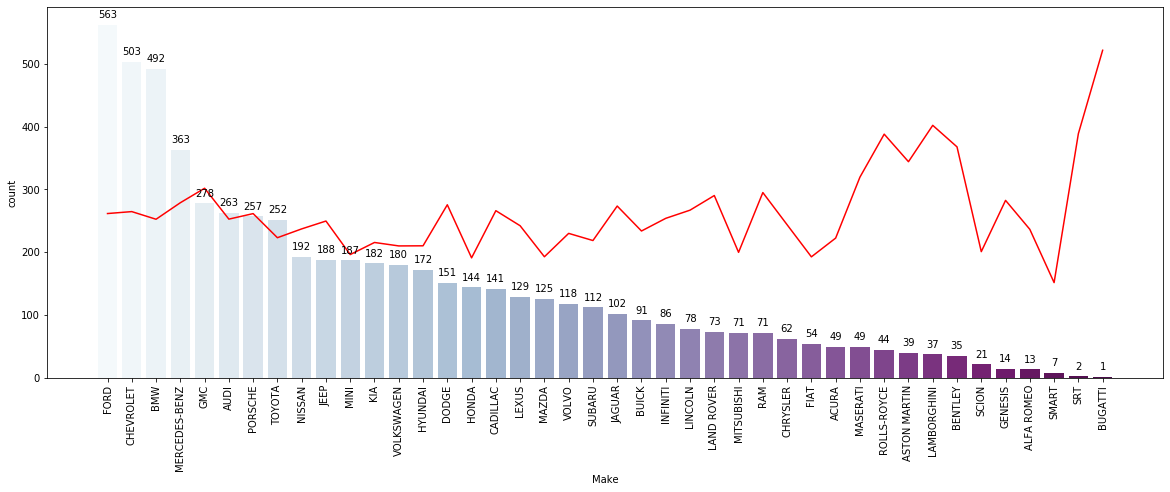

In [15]:
# What is the trend of mean emissions wrt each make?

plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
p= sns.countplot(co2.Make,order=make_desc_labels,palette = "BuPu")
p.set_xticklabels(labels= make_desc_labels,rotation=90)

for bar in p.patches:
    p.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# Distribution of emissions
plt.plot(mean_emission_by_each_make.index, mean_emission_by_each_make["CO2 Emissions(g/km)"],color = "r")

#### Interpretations:
    1. Mean Emissions for most of the commonly occurring brands have slight variations. 
    2. But, the less commonly occuring luxury cars from brands like Maserati, Rolls-Royce, Aston Martin, Bentley,
    Lambhorghini are quite high. 
    3. Bugatti vehicle occurs only THRICE but has the highest emissions, in the entire dataset
    
    Meaning - Luxury Cars tend to emit the most CO2 in general
    
#### Key Takeaways: 
    This column definitely could be a source of insight and might be very relevant to the model later on. 
    
#### Challenge identified
    High number of categories will pose a challenge for the encoding process
    
#### Possible Resolution - (?)
    We can maybe group the luxury cars (Maserati onwards) into another category 

### b. Model

    This is again a categorical variable

In [16]:
# How many unique models are there in this dataset?

co2.Model.nunique()

1596

    There are 1596 unique models in this dataset
    
#### Challenge Identified:
    If chosen for analysis in this current format, this will be a challenge to encode and an even bigger challenge for
    feature reduction and model computation. 
    
#### Key Takeaway:
    A certain model will be specific to the brand. 
    So, in the sense of the abstracted dataset, the model information does not add much to the target. 
    
    Also, the number of cylinders, vehicle type, fuel consumption etc add mode value to the record rather than the
    name of the model. 
    
    It makes sense to not consider this column for the nonce. 
    
#### Future Exploration
    If analysis is required for a specific company, then the model could play a more important role. 


### c. Vehicle Class

In [17]:
co2["Vehicle Class"].value_counts()

SUV - SMALL                 961
MID-SIZE                    931
COMPACT                     888
SUV - STANDARD              590
SUBCOMPACT                  517
FULL-SIZE                   471
PICKUP TRUCK - STANDARD     470
TWO-SEATER                  352
MINICOMPACT                 246
STATION WAGON - SMALL       199
PICKUP TRUCK - SMALL        118
VAN - PASSENGER              66
SPECIAL PURPOSE VEHICLE      61
MINIVAN                      54
STATION WAGON - MID-SIZE     45
VAN - CARGO                  22
Name: Vehicle Class, dtype: int64

    Let's do a similar analysis of mean emissions as per each Vehicle class for easy understanding

In [18]:
class_desc = co2["Vehicle Class"].value_counts().sort_values(ascending = False)
class_desc_labels = class_desc.index

mean_emission_by_each_class = co2.groupby(by = ["Vehicle Class"])["CO2 Emissions(g/km)"].mean().to_frame()
mean_emission_by_each_class.insert(loc = 0, value = class_desc , column = "Occurrence")
mean_emission_by_each_class = mean_emission_by_each_class.loc[class_desc_labels]
mean_emission_by_each_class

,Occurrence,CO2 Emissions(g/km)
SUV - SMALL,961,236.590010
MID-SIZE,931,223.068743
COMPACT,888,217.872748
SUV - STANDARD,590,306.561017
SUBCOMPACT,517,244.764023
FULL-SIZE,471,265.643312
PICKUP TRUCK - STANDARD,470,301.238298
TWO-SEATER,352,284.127841
MINICOMPACT,246,236.308943
STATION WAGON - SMALL,199,204.015075


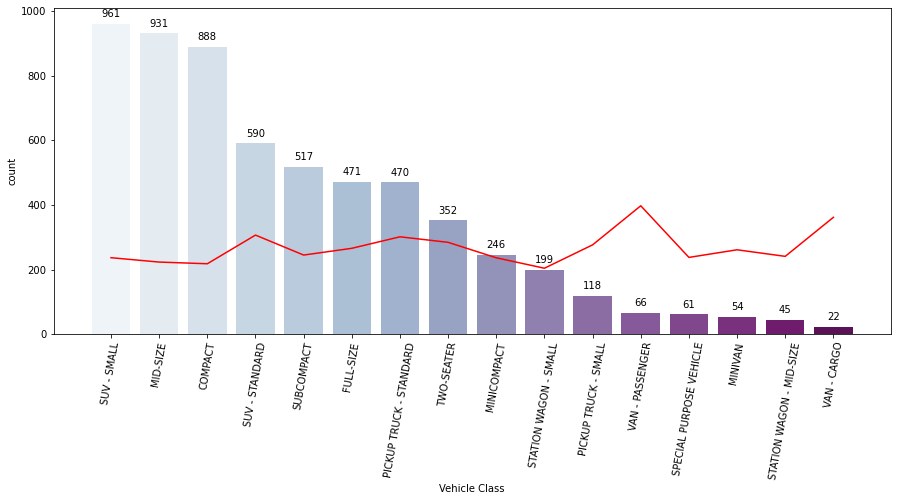

In [24]:
# What is the trend of mean emissions wrt each Vehicle Class?

plt.figure(figsize=(15,6))

p= sns.countplot(co2["Vehicle Class"],order=class_desc_labels,palette = "BuPu")
p.set_xticklabels(labels= class_desc_labels,rotation=80)

for bar in p.patches:
    p.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# Distribution of emissions
plt.plot(mean_emission_by_each_class.index, mean_emission_by_each_class["CO2 Emissions(g/km)"],color = "r")

#### Interpretation:
    1. Small SUVs, MidSize and Compact vehicles occur the most in this dataset. And for the most part, they have low mean
    emissions
    2. Most of the luxury cars fall under the two-seater category and according to this view, they have average emissions
    among different vehicle classes
    3. Cargo Vans occur least in the dataset. 
    4. Passenger Vans emit the most pollutant.
    
### d. Engine Size(L)
    This is a numeric column

Skewness:  0.7934683062942438


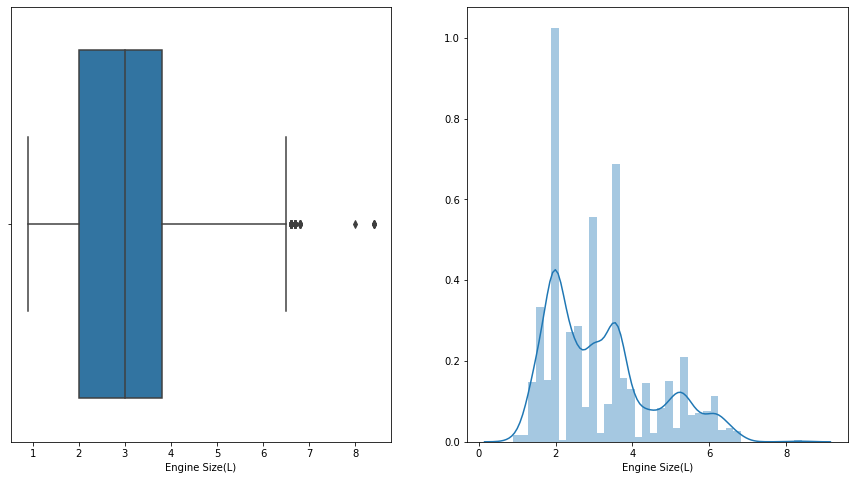

In [20]:
print("Skewness: ",co2["Engine Size(L)"].skew())
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(x = co2["Engine Size(L)"])

plt.subplot(1,2,2)
sns.distplot(co2["Engine Size(L)"])

    There are a few outliers in this column and the distribution seems to be slightly positively skewed
    
    Let's observe those rows that have engine size greater than max in this boxplot and see if any pattern emerges

In [21]:
Q1 = co2["Engine Size(L)"].quantile(0.25)
Q2 = co2["Engine Size(L)"].quantile(0.5)
Q3 = co2["Engine Size(L)"].quantile(0.75)

IQR = Q3 - Q1

max_val = Q3 + 1.5*IQR

print("Max Value of the Engine Size (in 5 point summary): ",max_val)

Max Value of the Engine Size (in 5 point summary):  6.5


In [22]:
# Vehicles that have engine size greater than max
co2[co2["Engine Size(L)"] > max_val]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
75,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,22.3,14.9,19.0,15,437
349,FORD,E350 WAGON,VAN - PASSENGER,6.8,10,A5,X,23.9,17.8,21.2,13,488
927,ROLLS-ROYCE,GHOST,FULL-SIZE,6.6,12,A8,Z,19.1,12.3,16.0,18,368
928,ROLLS-ROYCE,GHOST EWB,FULL-SIZE,6.6,12,A8,Z,19.1,12.3,16.0,18,368
929,ROLLS-ROYCE,PHANTOM,FULL-SIZE,6.7,12,A8,Z,20.7,12.8,17.1,17,393
...,...,...,...,...,...,...,...,...,...,...,...,...
7286,ROLLS-ROYCE,CULLINAN BLACK BADGE,STATION WAGON - MID-SIZE,6.7,12,AS8,Z,20.1,12.1,16.5,17,386
7287,ROLLS-ROYCE,DAWN,COMPACT,6.6,12,AS8,Z,20.4,13.1,17.1,17,400
7288,ROLLS-ROYCE,GHOST,FULL-SIZE,6.6,12,AS8,Z,20.4,13.1,17.1,17,400
7289,ROLLS-ROYCE,GHOST EWB,FULL-SIZE,6.6,12,AS8,Z,20.4,13.1,17.1,17,400


#### Interpretation:
    1. There are 61 outliers in this column. 
    2. Upon closer observation, most of these outliers are from the luxury brands (Rolls-Royce, Bugatti, etc)
    3. The only record with Ford is a Passenger Van that is already known to be the most polluting Vehicle Class
    4. All the 61 vehicles have number of cylinders greater than or equal to 8. They are proven fuel guzzlers. 
    5. The mean emission for these outliers is 393.737 g/km - a pretty high value. 
    
#### Key Takeaways:
    This column might prove to be very useful in the model building process to come. 
    
### e. Cylinder
    Our ambiguous column. 
    We need to analyze if this is a categorical column or discrete numerical one. 
    If proven to be categorical, appropriate discussion on encoding needs to be done. 

In [23]:
co2.Cylinders.value_counts()

4     2612
6     1931
8     1170
12     131
3       80
10      40
5       26
16       1
Name: Cylinders, dtype: int64

In [24]:
cyl_desc = co2["Cylinders"].value_counts().sort_values(ascending = False)
cyl_desc_labels = cyl_desc.index

mean_emission_by_each_cyl = co2.groupby(by = ["Cylinders"])["CO2 Emissions(g/km)"].mean().to_frame()
mean_emission_by_each_cyl.insert(loc = 0, value = cyl_desc , column = "Occurrence")
mean_emission_by_each_cyl = mean_emission_by_each_cyl.loc[cyl_desc_labels]
mean_emission_by_each_cyl

,Occurrence,CO2 Emissions(g/km)
4,2612,205.205590
6,1931,264.091662
8,1170,321.711966
12,131,382.290076
3,80,174.612500
10,40,362.600000
5,26,235.692308
16,1,522.000000


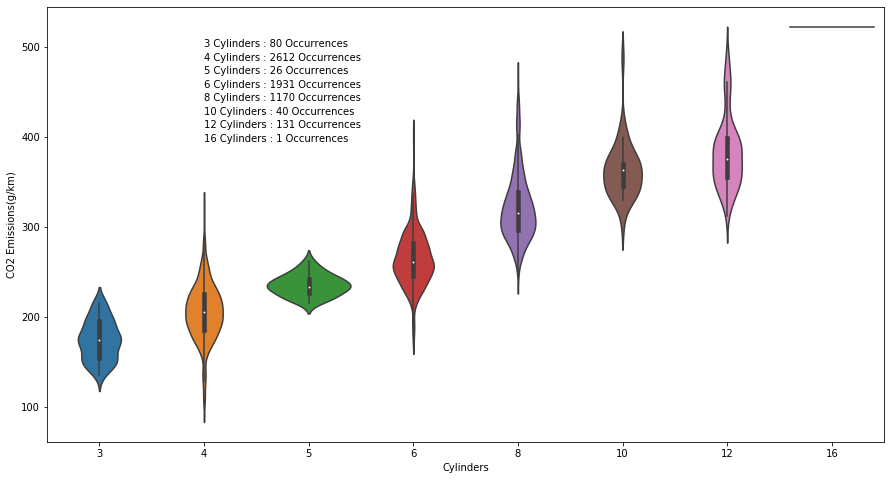

In [27]:
plt.figure(figsize=(15,8))
sns.violinplot(x =co2["Cylinders"],y= co2["CO2 Emissions(g/km)"])

y = 500
for ind in mean_emission_by_each_cyl.sort_index().index:
    plt.annotate(str(ind) + " Cylinders : " + str(mean_emission_by_each_cyl.loc[ind,"Occurrence"]) + " Occurrences", xy = (1,y))
    y -= 15

#### Interpretation:
        1. There is an increase in the median emissions as the number of cylinders increase. 
        2. In the dataset, the maximum number of vehicles have 4, 6 or 8 cylinders. 
        3. Vehicles with 3 and 5 cylinders emit much lesser CO2 that those with 10, 12 or 16 cylinders. 
        4. Even though 16 cylinder vehicles appear only thrice in the dataset, they emit the most CO2. 
        
#### Key Takeaways:

    1. The impact of number of cylinders on the target cannot be denied. 
    2. It is more logical to treat this column as categorical as each category has its own behaviour wrt the target. 
    3. The main task is to now figure out the encoding method. 
    
#### Comaparative Study of the Encoding methods with reference to this column 
    1. Frequency encoding would be inappropriate here because undue weightage will be given to the 4, 6, 8 cylinder
    vehicles even though they have lesser emissions
    2. One Hot Encoding democratizes the weightage given to each category and thus has both merits and demerits.
    3. Retaining the current order in the form of ordinal encoding might also be explored because as the number of
    cylinders increases, in general, the emission also increases
    
    
### f. Fuel Type
    Categorical Variable Again
        X = Regular gasoline
        Z = Premium gasoline
        D = Diesel
        E = Ethanol (E85)
        N = Natural gas

In [32]:
co2["Fuel Type"].value_counts().to_frame()

,Fuel Type
X,2878
Z,2641
E,325
D,146
N,1


<AxesSubplot:xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

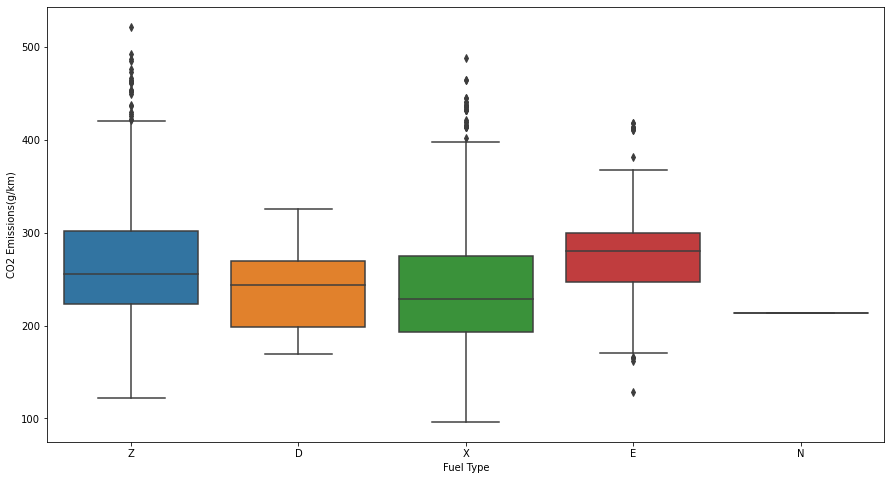

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(x = co2["Fuel Type"], y = co2["CO2 Emissions(g/km)"])

#### Interpretation:
    1. X (Regular Gasoline) and Z (Premium Gasoline) occur the most in the dataset and they encompass a wide range of emissions. 
    2. Natural Gas occurs only once in the dataset. 
    3. There is no apparent, obvious pattern discernible. 
    4. One hot encoding might be best while taking the column towards modelling. 
    
    Further analysis falls under feature engineering and blends EDA into it as well. 

<a id="feature"></a>
# Continuing EDA with Feature Engineering
### g. Transmission

In [34]:
co2.Transmission.value_counts()

AS6     1103
AS8     1019
M6       724
A6       671
AM7      357
A8       350
AS7      278
A9       250
AV       224
M5       165
AS10     149
AM6       97
AV6       83
AV7       83
A5        72
M7        66
AS9       60
A4        58
A7        42
AM8       42
AV8       33
A10       25
AS5       24
AV10       9
AM5        4
AS4        2
AM9        1
Name: Transmission, dtype: int64

    After a course of different, unsuccessful EDA methods, we checked back with the domain of Vehicles and Vehicular 
    Emissions. 
    Transmission type encompasses these categories:
        A = Automatic
        AM = Automated manual
        AS = Automatic with select shift
        AV = Continuously variable
        M = Manual
     In the dataset, the transmission information is appended with the number of gears the vehicles have. 
     
     
     Also, the number of gears inversely influences the emissions according to the domain. 
     So, it makes more sense to study the presence or absence of that behaviour considering gears alone. 
     
     So, it makes more sense to split the transmission and gear information into two separate columns and then check the
     behaviour of target. 

In [30]:
transmission = []
gears = []

for t in co2["Transmission"]:
    trans = ""
    gear = ""
    if t == "AV":
        transmission.append(t)
        gears.append(0)
    else:
        for char in list(t):
            if char.isalpha():
                trans = trans + char
            else:
                gear = gear + char
        transmission.append(trans)
        gears.append(gear)
    #print(t, transmission[-1], gears[-1])
co2_new = co2.copy()
co2_new["Transmission"] = transmission
co2_new["Gear"] = gears
co2_new.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gear
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196,5
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244,6


In [31]:
trans_desc = co2_new["Transmission"].value_counts().sort_values(ascending = False)
trans_desc_labels = trans_desc.index

mean_emission_by_each_trans = co2_new.groupby(by = ["Transmission"])["CO2 Emissions(g/km)"].mean().to_frame()
mean_emission_by_each_trans.insert(loc = 0, value = trans_desc , column = "Occurrence")
mean_emission_by_each_trans = mean_emission_by_each_trans.loc[trans_desc_labels]
mean_emission_by_each_trans 

,Occurrence,CO2 Emissions(g/km)
AS,2635,255.735104
A,1468,278.963896
M,955,227.788482
AM,501,253.838323
AV,432,183.962963


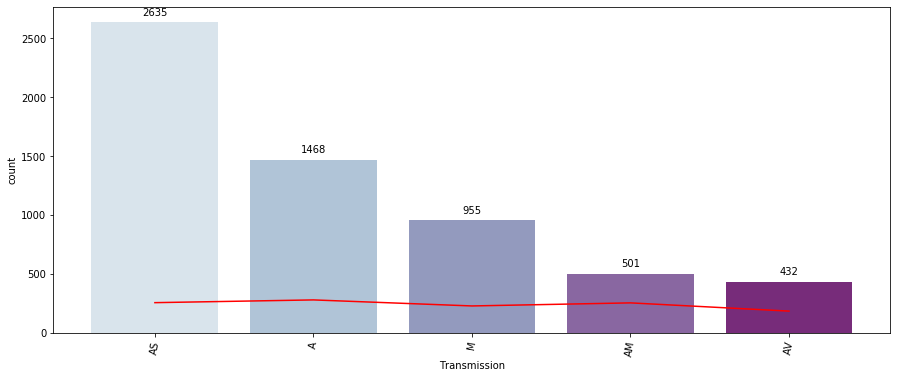

In [32]:
# What is the trend of mean emissions wrt Transmission type?

plt.figure(figsize=(15,6))

p= sns.countplot(co2_new["Transmission"],order=trans_desc_labels,palette = "BuPu")
p.set_xticklabels(labels= trans_desc_labels,rotation=80)

for bar in p.patches:
    p.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# Distribution of emissions
plt.plot(mean_emission_by_each_trans.index, mean_emission_by_each_trans["CO2 Emissions(g/km)"],color = "r")

    We see that mean emissions do not change much for the different transmission types. 
    
    Hold on to this thought, it will come up in modelling again!

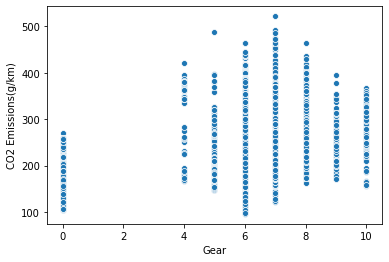

In [33]:
co2_new['Gear'] = co2_new['Gear'].astype('int')

sns.scatterplot(x = co2_new.Gear, y = co2_new["CO2 Emissions(g/km)"])

In [35]:
co2_new.Gear.value_counts()

6     2678
8     1444
7      826
9      311
5      265
0      224
10     183
4       60
Name: Gear, dtype: int64

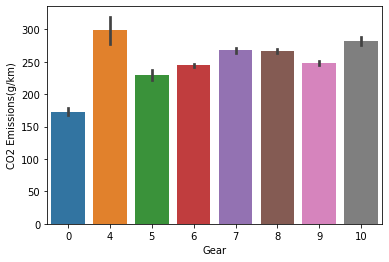

In [34]:
co2_new['Gear'] = co2_new['Gear'].astype('int')

sns.barplot(x = co2_new.Gear, y = co2_new["CO2 Emissions(g/km)"])

    We will be able to judge the true relevance of the Gear Column while modelling.
    
### h. Fuel Consumption: City, Highway and Combined

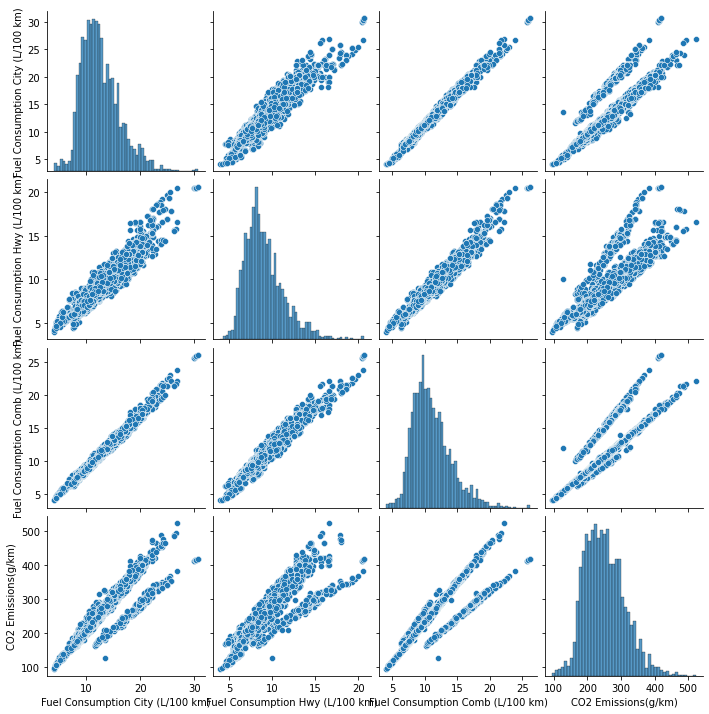

In [41]:
# Check the relationship of these columns with target
sns.pairplot(co2_new[["Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)","Fuel Consumption Comb (L/100 km)","CO2 Emissions(g/km)"]])

In [42]:
fuel = co2_new[["Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)","Fuel Consumption Comb (L/100 km)"]]
fuel.head()

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km)
0,9.9,6.7,8.5
1,11.2,7.7,9.6
2,6.0,5.8,5.9
3,12.7,9.1,11.1
4,12.1,8.7,10.6


<AxesSubplot:>

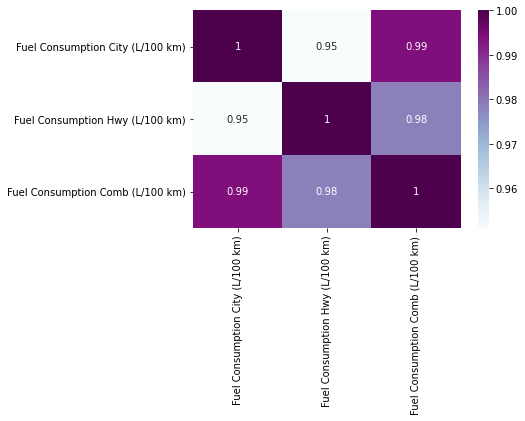

In [43]:
sns.heatmap(fuel.corr(),annot = True, cmap = "BuPu")

     Fuel Consumption in City and Highway are closely related to the Combined Fuel column
     
     This is a direct evidence of multicollinearity and feature reduction can be done. 
     
     According to metadata, Combined column is the weighted sum of City and Highway column. Let's check that assumption. 

In [44]:
fuel["Weighted"] = round(0.55*fuel["Fuel Consumption City (L/100 km)"] + 0.45*fuel["Fuel Consumption Hwy (L/100 km)"],1)
fuel.head()

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Weighted
0,9.9,6.7,8.5,8.5
1,11.2,7.7,9.6,9.6
2,6.0,5.8,5.9,5.9
3,12.7,9.1,11.1,11.1
4,12.1,8.7,10.6,10.6


In [45]:
#Check the percentage of similarity

fuel["diff"] = abs(fuel["Fuel Consumption Comb (L/100 km)"] - fuel["Weighted"])
fuel["diff"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7380    0.0
7381    0.0
7382    0.0
7383    0.0
7384    0.1
Name: diff, Length: 5991, dtype: float64

    This assumption is quite true. 
    
    We can also see that Fuel Combined is closely related to the Target
    
    We can seriously consider dropping the City and Highway Columns and using Combined column only. 
    
### i. Fuel Consumption Comb (mpg)
    This is obviously a numerical column 

<AxesSubplot:xlabel='Fuel Consumption Comb (mpg)'>

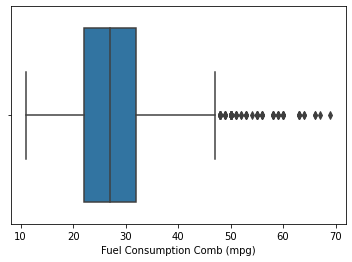

In [46]:
sns.boxplot(x = co2_new["Fuel Consumption Comb (mpg)"])

#### Interpretation:
    1. Fuel Consumption (mpg) is a very interesting column because, from the domain, it can be deduced that, fuel
    consumption can be measured both in L/100km or Imperial Miles per gallon. 
   **Conversion Rate: 1 L/100km = 282.5 Imperial MPG**
    
    2. Let's confirm that this column is indeed a converted form of Fuel Combined. 

In [36]:
fuel_litre_and_mpg = co2_new[["Fuel Consumption Comb (L/100 km)","Fuel Consumption Comb (mpg)"]]
fuel_litre_and_mpg.head() 

,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,8.5,33
1,9.6,29
2,5.9,48
3,11.1,25
4,10.6,27


In [49]:
fuel_litre_and_mpg["converted_difference"] = abs(round((282.5 / fuel_litre_and_mpg["Fuel Consumption Comb (L/100 km)"]) - fuel_litre_and_mpg['Fuel Consumption Comb (mpg)']))
fuel_litre_and_mpg.head()

,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),converted_difference
0,8.5,33,0.0
1,9.6,29,0.0
2,5.9,48,0.0
3,11.1,25,0.0
4,10.6,27,0.0


In [38]:
fuel_litre_and_mpg[fuel_litre_and_mpg["converted_difference"]!=0]

,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),converted_difference
1099,9.9,28,1.0


In [50]:
fuel_litre_and_mpg["converted_difference"].value_counts()

0.0    5990
1.0       1
Name: converted_difference, dtype: int64

In [50]:
5990/co2.shape[0]*100

99.983308295777

In [51]:
fuel_litre_and_mpg[fuel_litre_and_mpg["converted_difference"] == 1.0]

,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),converted_difference
1099,9.9,28,1.0


#### Interpretation: 
    1. 99.98% of the difference matches. The two columns are logically closely related. 
    2. Fuel Combined L/100km is the best option for retaining the values. 
    
## Conclusions from the EDA and Feature Engineering process

    1. Column containing Model information can be dropped
    2. Vehicle Class is best encoded with one-hot encoding
    3. The Number of cylinders column is best treated as a categorical variable. Right now, it is ordinally encoded. It
    could be left like that
    4. Transmission column has been logically split into Transmission Type and Gears
    5. Fuel Consumption City and Fuel Consumption Highway column can be collapsed into the Fuel Consumption Combined Column
    6. Fuel Consumption (mpg) is a redundant form of Fuel Consumption Combined and thus can be removed. 
    
    Let's drop the redundant columns and compare the correlation matrices. 

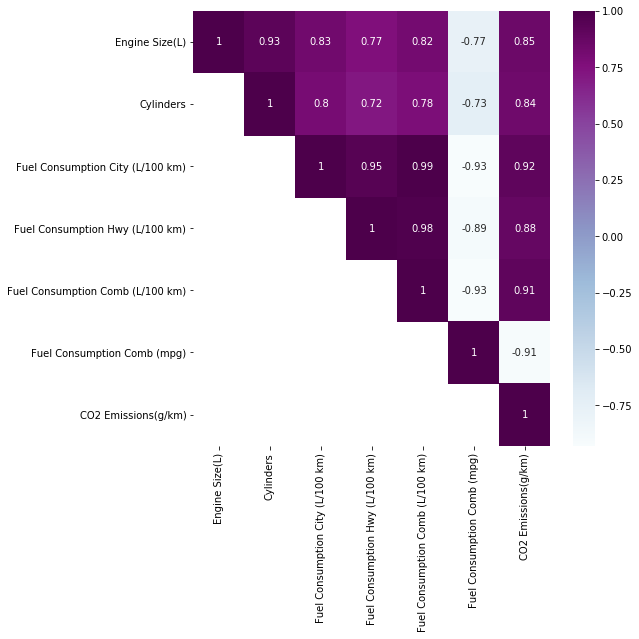

In [52]:
# Initial Correlation Matrix:
plt.figure(figsize = (8,8))
corr = co2.corr()
corr_ut = corr.where(np.triu(np.ones(corr.shape)).astype(bool))
sns.heatmap(corr_ut,annot = True,cmap = "BuPu")

In [58]:
#Remove columns as per analysis
co2_new.drop(axis=1, columns=["Model","Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)","Fuel Consumption Comb (mpg)"], inplace = True)

In [60]:
cols = list(co2_new.columns)
cols.remove("CO2 Emissions(g/km)")
cols.append("CO2 Emissions(g/km)")

co2_new = co2_new[cols]
co2_new.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),Gear,CO2 Emissions(g/km)
0,ACURA,COMPACT,2.0,4,AS,Z,8.5,5,196
1,ACURA,COMPACT,2.4,4,M,Z,9.6,6,221
2,ACURA,COMPACT,1.5,4,AV,Z,5.9,7,136
3,ACURA,SUV - SMALL,3.5,6,AS,Z,11.1,6,255
4,ACURA,SUV - SMALL,3.5,6,AS,Z,10.6,6,244


<AxesSubplot:>

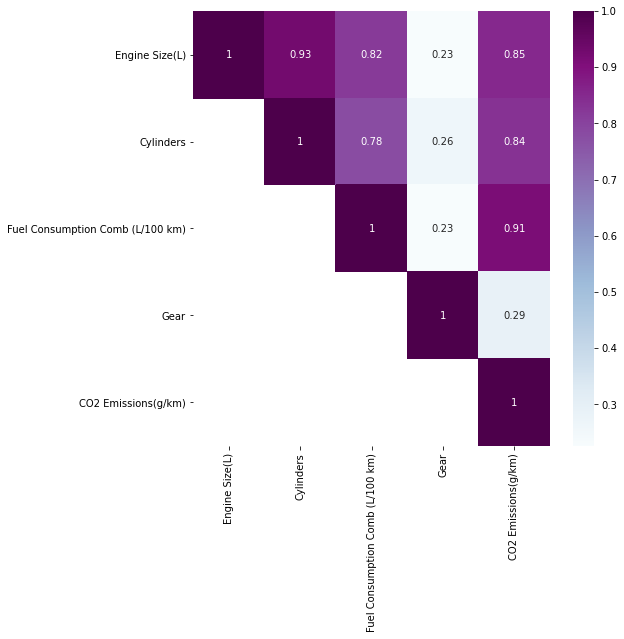

In [61]:
# Correlation Matrix after removal of some columns
plt.figure(figsize = (8,8))
corr = co2_new.corr()
corr_ut = corr.where(np.triu(np.ones(corr.shape)).astype(bool))
sns.heatmap(corr_ut,annot = True,cmap = "BuPu")

<a id="encode"></a>
# Encoding

       We have chosen to go with, for all intents and purposes, the columns:
           1. Make
           2. Vehicle Class
           3. Engine Size(L)
           4. Cylinders
           5. Transmission
           6. Fuel Type
           7. Fuel Consumption Comb (L/100 km)
           8. Gear
           
           as independent variables, for modelling. 
           
       Of these, Make, Vehicle Class, Transmission, Fuel Type and Gear are categorical and thus will have to be encoded 
       accordingly. 
       
       Encoding Policies Chosen:
            1. Make - OneHot
            2. Vehicle Class - OneHot
            3. Cylinders - Ordinal
            4. Transmission - OneHot
            5. Fuel Type - OneHot 
            6. Gear - Reverse Ordinal
            
       For the purpose of modelling, we shall encode all the columns now. 
       Depending on the model we are building at that time, we will choose the necessary columns.

In [64]:
# Store away the target column 
y = co2_new["CO2 Emissions(g/km)"]

In [66]:
# Encoding Make, Vehicle Class, Fuel Type and Transmission
co2_enc = pd.get_dummies(co2_new.drop(axis=1, columns="CO2 Emissions(g/km)"), columns = ["Make","Vehicle Class", "Fuel Type","Transmission"])
co2_enc.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Gear,Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,...,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Transmission_A,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M
0,2.0,4,8.5,5,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2.4,4,9.6,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.5,4,5.9,7,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3.5,6,11.1,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.5,6,10.6,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [67]:
# Ordinal Encoding for Cylinders column
orderencoding = OrdinalEncoder(categories = [[2,3,4,5,6,8,10,12,16]])
co2_enc['Cylinders'] = orderencoding.fit_transform(co2_enc['Cylinders'].values.reshape(-1,1))
co2_enc.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Gear,Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,...,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Transmission_A,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M
0,2.0,2.0,8.5,5,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2.4,2.0,9.6,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.5,2.0,5.9,7,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3.5,4.0,11.1,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.5,4.0,10.6,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [68]:
# Reverse Ordinal encoding for Gear
vals = [0,4,5,6,7,8,9,10]
codes = [8,7,6,5,4,3,2,1]
encoder = dict(zip(vals,codes))
co2_enc["Gear"] = co2_enc["Gear"].map(encoder)
co2_enc.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Gear,Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,...,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Transmission_A,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M
0,2.0,2.0,8.5,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2.4,2.0,9.6,5,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.5,2.0,5.9,4,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3.5,4.0,11.1,5,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,3.5,4.0,10.6,5,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


    The variables : co2_enc and y can be used as per convenience for modelling
    
<a id="scale"></a>
# Scaling

   **Do we need scaling?**
    
    We need scaling because different columns operate under different ranges. It makes sense to scale the independent 
    variables and then proceed. 
    
   **What scaling method to use?**
   
    Standardization can be applied iff the columns are normal. If that doesn't work, we have to proceed with MinMax 
    scaling. 

In [70]:
normality = pd.DataFrame([(col ,list(stats.shapiro(co2_enc[col]))[0],list(stats.shapiro(co2_enc[col]))[1]) for col in co2_enc.columns], columns = ["Column","Shapiro Statistic","PValue"])
normality

,Column,Shapiro Statistic,PValue
0,Engine Size(L),0.918557,0.000000e+00
1,Cylinders,0.824034,0.000000e+00
2,Fuel Consumption Comb (L/100 km),0.954457,1.132035e-39
3,Gear,0.892992,0.000000e+00
4,Make_ACURA,0.061570,0.000000e+00
...,...,...,...
67,Transmission_A,0.534295,0.000000e+00
68,Transmission_AM,0.308307,0.000000e+00
69,Transmission_AS,0.631321,0.000000e+00
70,Transmission_AV,0.281969,0.000000e+00


In [72]:
normality[normality["PValue"] > 0.05]

,Column,Shapiro Statistic,PValue


    All columns fail the shapiro test for normality. Min Max scaling would be best in this case. 

In [73]:
# MinMax Scaling
for col in co2_enc.columns:
    co2_enc[col] = (co2_enc[col] - co2_enc[col].min())/(co2_enc[col].max() - co2_enc[col].min())

co2_enc.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Gear,Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,...,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Transmission_A,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M
0,0.146667,0.142857,0.200000,0.714286,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.200000,0.142857,0.250000,0.571429,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.080000,0.142857,0.081818,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.346667,0.428571,0.318182,0.571429,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.346667,0.428571,0.295455,0.571429,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<a id="model"></a>
# Linear Regression - Modelling and Fine Tuning

### Functions for general use throughout modelling 

In [74]:
def get_train_rmse(model,X_train,y_train):
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

def get_score(model,X_train,y_train):
    r_sq = model.score(X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

In [75]:
def get_test_rmse(model,X_test,y_test):
    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

In [76]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model,X_test,y_test):
    test_pred = model.predict(X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

In [77]:
def get_score(model,X_train,y_train):
    r_sq = model.score(X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

In [79]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])
def update_score_card(algorithm_name, model, X_train, y_train, X_test, y_test , alpha = '-', l1_ratio = '-'):
    global score_card
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model,X_test,y_test), 
                       'Test_RMSE': get_test_rmse(model,X_test,y_test), 
                       'R-Squared': get_score(model,X_train,y_train)[0], 
                       'Adj. R-Squared': get_score(model,X_train,y_train)[1]}, ignore_index = True)

<a id ="m1"></a>
### Model 1 - SLR Model with Fuel Consumption Comb (L/100) and Target

In [82]:
X1 = co2_enc["Fuel Consumption Comb (L/100 km)"]

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, y, test_size = 0.3, random_state=100)

# print the shapes of split data
print("X_train ",X_train1.shape)
print("X_test ",X_test1.shape)
print("Y_train ",Y_train1.shape)
print("Y_test ",Y_test1.shape)

X_train  (4193,)
X_test  (1798,)
Y_train  (4193,)
Y_test  (1798,)


In [83]:
X_train1 = sm.add_constant(X_train1)
X_train1.head()

,const,Fuel Consumption Comb (L/100 km)
3664,1.0,0.618182
3306,1.0,0.295455
919,1.0,0.386364
2282,1.0,0.236364
3272,1.0,0.145455


In [84]:
m1 = sm.OLS(Y_train1, X_train1).fit()
print(m1.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.836
Model:                             OLS   Adj. R-squared:                  0.836
Method:                  Least Squares   F-statistic:                 2.132e+04
Date:                 Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                         17:40:25   Log-Likelihood:                -19257.
No. Observations:                 4193   AIC:                         3.852e+04
Df Residuals:                     4191   BIC:                         3.853e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [85]:
# We check the RMSE values. 
# Overfitting Check
print('RMSE on train set: ', get_train_rmse(m1,X_train1,Y_train1))

X_test1 = sm.add_constant(X_test1)
print('RMSE on test set: ', get_test_rmse(m1,X_test1,Y_test1))

difference = abs(get_test_rmse(m1,X_test1,Y_test1) - get_train_rmse(m1,X_train1,Y_train1))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  23.8935
RMSE on test set:  24.1343
Difference between RMSE on train and test set:  0.24080000000000013


#### Interpretation:

    1. The Rsquared value is 0.836. It's a pretty good starting point. 
    2. Multicollinearity is also (obviously) low. 
    3. Both the intercept and Fuel Consumption are significant to the target
    4. P Value for F Test shows that the model is significant. 
    5. The test for Autocollinearity shows a value close to 2, which is good. 
    6. The Train and Test RMSEs vary very slightly (compared to the scale of target). This is good.
    7. Normality of residuals is not there. 


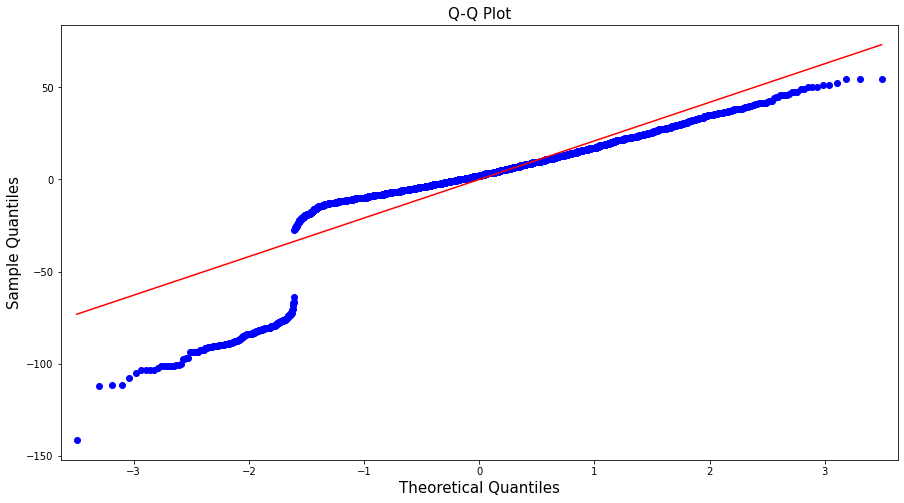

In [86]:
plt.rcParams['figure.figsize'] = [15,8]
qqplot(m1.resid, line = 'r')
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)
plt.show()

In [112]:
#Append Score Card

score_cards = pd.DataFrame(columns=['Model_Name','R-squared',
                                       'Adj. R-squared','Train_RMSE', 'Test_RMSE', 'abs_difference_in_RMSE','Train_MAPE', 'Test_MAPE'])
M1_metrics = pd.Series({'Model_Name': "SLR Model with Fuel Consumption Comb (L/100)",
                     'R-squared': m1.rsquared,
                     'Adj. R-squared': m1.rsquared_adj,
                     'Train_RMSE': get_train_rmse(m1,X_train1,Y_train1),
                     'Test_RMSE': get_test_rmse(m1,X_test1,Y_test1),
                    'abs_difference_in_RMSE': abs(get_train_rmse(m1,X_train1,Y_train1) - get_test_rmse(m1,X_test1,Y_test1)),
                     'Train_MAPE': get_test_mape(m1,X_train1,Y_train1),
                     'Test_MAPE': get_test_mape(m1,X_test1,Y_test1)
                   })

score_cards= score_cards.append(M1_metrics, ignore_index = True)

In [113]:
score_cards

,Model_Name,R-squared,Adj. R-squared,Train_RMSE,Test_RMSE,abs_difference_in_RMSE,Train_MAPE,Test_MAPE
0,SLR Model with Fuel Consumption Comb (L/100),0.835728,0.835689,23.8935,24.1343,0.2408,5.630718,5.610589


    
    There is scope for improvement in the R2 value. 
    
    Let's start by adding another column  -Engine Size (L) to the mix.
<a id ="m2"></a>    
### Model 2 - Fuel Consumption and Engine Size with Target

In [90]:
# Let's add Engine Size next
X2 = co2_enc[["Fuel Consumption Comb (L/100 km)","Engine Size(L)"]]

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y, test_size = 0.3, random_state=100)

# print the shapes of split data
print("X_train ",X_train2.shape)
print("X_test ",X_test2.shape)
print("Y_train ",Y_train2.shape)
print("Y_test ",Y_test2.shape)

X_train  (4193, 2)
X_test  (1798, 2)
Y_train  (4193,)
Y_test  (1798,)


In [91]:
X_train2.head()

,Fuel Consumption Comb (L/100 km),Engine Size(L)
3664,0.618182,0.546667
3306,0.295455,0.146667
919,0.386364,0.360000
2282,0.236364,0.280000
3272,0.145455,0.066667


In [92]:
X_train2 = sm.add_constant(X_train2)
m2 = sm.OLS(Y_train2, X_train2).fit()
print(m2.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.870
Model:                             OLS   Adj. R-squared:                  0.870
Method:                  Least Squares   F-statistic:                 1.397e+04
Date:                 Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                         17:50:41   Log-Likelihood:                -18773.
No. Observations:                 4193   AIC:                         3.755e+04
Df Residuals:                     4190   BIC:                         3.757e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

        1. R2 and Adj R2 are really good! 
        2. Multicollinearity is also a good value. 
        3. According to F Test, the model is significant
    
        4. Autocorrelation is almost not present. 
    
        Let's check RMSEs and the qqplot

In [100]:
# We check the RMSE values. 
# Overfitting Check
print('RMSE on train set: ', get_train_rmse(m2,X_train2,Y_train2))

X_test2 = sm.add_constant(X_test2)
print('RMSE on test set: ', get_test_rmse(m2,X_test2,Y_test2))

difference = abs(get_test_rmse(m2,X_test2,Y_test2) - get_train_rmse(m2,X_train2,Y_train2))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  21.2899
RMSE on test set:  21.4891
Difference between RMSE on train and test set:  0.19920000000000115


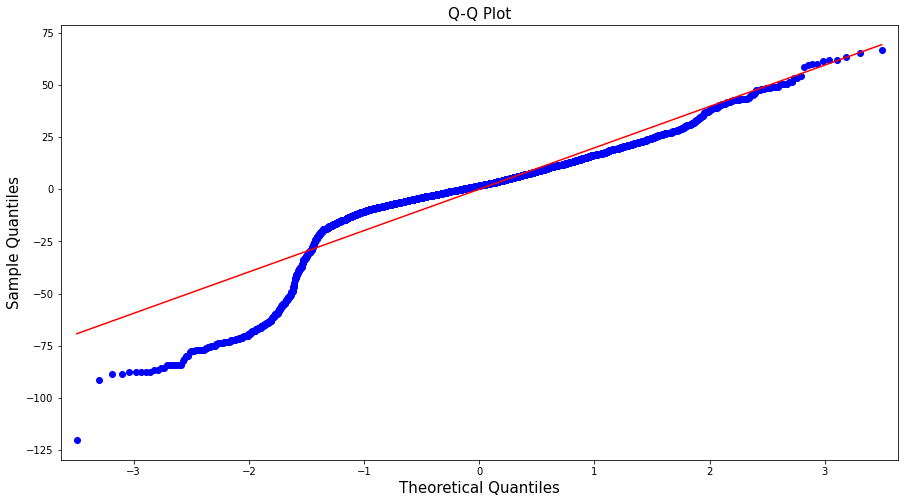

In [101]:
# Q-Q plot
plt.rcParams['figure.figsize'] = [15,8]
qqplot(m2.resid, line = 'r')
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)
plt.show()

    Glaring gaps in the QQ Plot have been filled, but the normality is still not there. 

In [114]:
M2_metrics = pd.Series({'Model_Name': "Model with Fuel Consumption Comb and Engine Size",
                     'R-squared': m2.rsquared,
                     'Adj. R-squared': m2.rsquared_adj,
                     'Train_RMSE': get_train_rmse(m2,X_train2,Y_train2),
                     'Test_RMSE': get_test_rmse(m2,X_test2,Y_test2),
                    'abs_difference_in_RMSE': abs(get_train_rmse(m2,X_train2,Y_train2) - get_test_rmse(m2,X_test2,Y_test2)),
                     'Train_MAPE': get_test_mape(m2,X_train2,Y_train2),
                     'Test_MAPE': get_test_mape(m2,X_test2,Y_test2)
                   })

score_cards= score_cards.append(M2_metrics, ignore_index = True)

In [115]:
score_cards

,Model_Name,R-squared,Adj. R-squared,Train_RMSE,Test_RMSE,abs_difference_in_RMSE,Train_MAPE,Test_MAPE
0,SLR Model with Fuel Consumption Comb (L/100),0.835728,0.835689,23.8935,24.1343,0.2408,5.630718,5.610589
1,Model with Fuel Consumption Comb and Engine Size,0.869577,0.869515,21.2899,21.4891,0.1992,5.552102,5.674500


<a id ="m3"></a>
### Model 3 - Adding Gear and Cylinders information

    Gear and Cylinders have been ordinally encoded. 

In [51]:
for ind in range(len(co2_v2_enc.columns)):
    
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(co2_v2_enc.values, i) for i in range(co2_v2_enc.shape[1])]
    vif["Features"] = co2_v2_enc.columns
    multi = vif[vif['VIF_Factor'] > 10]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    if (df_sorted.empty == False):
        df_numeric_features_vif = co2_v2_enc.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

In [52]:
vif

,VIF_Factor,Features
0,8.926236,Engine Size(L)
1,8.110559,Cylinders
2,8.452166,Fuel Consumption Comb (L/100 km)
3,1.676921,Gear
4,inf,Vehicle Class_COMPACT
5,inf,Vehicle Class_FULL-SIZE
6,inf,Vehicle Class_MID-SIZE
7,inf,Vehicle Class_MINICOMPACT
8,inf,Vehicle Class_MINIVAN
9,inf,Vehicle Class_PICKUP TRUCK - SMALL


In [119]:
# Let's add Cylinders and Gears next
X3 = co2_enc[["Fuel Consumption Comb (L/100 km)","Engine Size(L)","Cylinders","Gear"]]

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, y, test_size = 0.3, random_state=100)

# print the shapes of split data
print("X_train ",X_train3.shape)
print("X_test ",X_test3.shape)
print("Y_train ",Y_train3.shape)
print("Y_test ",Y_test3.shape)

X_train  (4193, 4)
X_test  (1798, 4)
Y_train  (4193,)
Y_test  (1798,)


In [120]:
X_train3 = sm.add_constant(X_train3)
m3 = sm.OLS(Y_train3, X_train3).fit()
print(m3.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.877
Model:                             OLS   Adj. R-squared:                  0.877
Method:                  Least Squares   F-statistic:                     7483.
Date:                 Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                         18:48:41   Log-Likelihood:                -18646.
No. Observations:                 4193   AIC:                         3.730e+04
Df Residuals:                     4188   BIC:                         3.733e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [121]:
# We check the RMSE values. 
# Overfitting Check
print('RMSE on train set: ', get_train_rmse(m3,X_train3,Y_train3))

X_test3 = sm.add_constant(X_test3)
print('RMSE on test set: ', get_test_rmse(m3,X_test3,Y_test3))

difference = abs(get_test_rmse(m3,X_test3,Y_test3) - get_train_rmse(m3,X_train3,Y_train3))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  20.6537
RMSE on test set:  20.764
Difference between RMSE on train and test set:  0.11029999999999873


In [124]:
M3_metrics = pd.Series({'Model_Name': "Model with significant features selected with VIF",
                     'R-squared': m3.rsquared,
                     'Adj. R-squared': m3.rsquared_adj,
                     'Train_RMSE': get_train_rmse(m3,X_train3,Y_train3),
                     'Test_RMSE': get_test_rmse(m3,X_test3,Y_test3),
                    'abs_difference_in_RMSE': abs(get_train_rmse(m3,X_train3,Y_train3) - get_test_rmse(m3,X_test3,Y_test3)),
                     'Train_MAPE': get_test_mape(m3,X_train3,Y_train3),
                     'Test_MAPE': get_test_mape(m3,X_test3,Y_test3)
                   })

score_cards= score_cards.append(M3_metrics, ignore_index = True)
score_cards

,Model_Name,R-squared,Adj. R-squared,Train_RMSE,Test_RMSE,abs_difference_in_RMSE,Train_MAPE,Test_MAPE
0,SLR Model with Fuel Consumption Comb (L/100),0.835728,0.835689,23.8935,24.1343,0.2408,5.630718,5.610589
1,Model with Fuel Consumption Comb and Engine Size,0.869577,0.869515,21.2899,21.4891,0.1992,5.552102,5.674500
2,Model with significant features selected with VIF,0.877257,0.877139,20.6537,20.7640,0.1103,5.364678,5.448990


    We see that the R2 and adjusted R2 have become better. 
    
    The difference between Train and Test RMSE are also reducing. 
    
    The Multicollinearity for this model is also good. 
    So is the value for autocorrelation
***
    
    We can now try and add the columns Vehicle Size, Fuel Type and Transmission using various kinds of Modelling and see if 
    the model can be improved even further. 
    
    For the purpose of comparative study, 
        1. Simple OLS
        2. Recursive Feature Elimination
        3. Stochastic Gradient Descent 
        4. Forward Selection methods have been used. 
<a id ="m4"></a>      
### Model 4 - All columns except Make

In [130]:
# Let's add Cylinders and Gears next
X4 = pd.concat((co2_enc.loc[:,"Engine Size(L)" : "Gear"], co2_enc.loc[:,"Vehicle Class_COMPACT":]),axis = 1)
X4.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Gear,Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,...,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Transmission_A,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M
0,0.146667,0.142857,0.200000,0.714286,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.200000,0.142857,0.250000,0.571429,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.080000,0.142857,0.081818,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.346667,0.428571,0.318182,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.346667,0.428571,0.295455,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [131]:
#For the use of all the 4 variants
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, y, test_size = 0.3, random_state=100)

# print the shapes of split data
print("X_train ",X_train4.shape)
print("X_test ",X_test4.shape)
print("Y_train ",Y_train4.shape)
print("Y_test ",Y_test4.shape)

X_train  (4193, 30)
X_test  (1798, 30)
Y_train  (4193,)
Y_test  (1798,)


<a id ="m4a"></a>
### Variant a - Simple OLS Model

In [134]:
X_train4a = sm.add_constant(X_train4)
m4a = sm.OLS(Y_train4, X_train4a).fit()
print(m4a.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.992
Model:                             OLS   Adj. R-squared:                  0.992
Method:                  Least Squares   F-statistic:                 1.980e+04
Date:                 Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                         19:07:19   Log-Likelihood:                -12928.
No. Observations:                 4193   AIC:                         2.591e+04
Df Residuals:                     4166   BIC:                         2.608e+04
Df Model:                           26                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [136]:
# We check the RMSE values. 
# Overfitting Check
print('RMSE on train set: ', get_train_rmse(m4a,X_train4a,Y_train4))

X_test4a = sm.add_constant(X_test4)
print('RMSE on test set: ', get_test_rmse(m4a,X_test4a,Y_test4))

difference = abs(get_test_rmse(m4a,X_test4a,Y_test4) - get_train_rmse(m4a,X_train4a,Y_train4))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  5.282
RMSE on test set:  5.9826
Difference between RMSE on train and test set:  0.7005999999999997


In [137]:
M4_metrics = pd.Series({'Model_Name': "All Columns Except Make - OLS",
                     'R-squared': m4a.rsquared,
                     'Adj. R-squared': m4a.rsquared_adj,
                     'Train_RMSE': get_train_rmse(m4a,X_train4a,Y_train4),
                     'Test_RMSE': get_test_rmse(m4a,X_test4a,Y_test4),
                    'abs_difference_in_RMSE': abs(get_train_rmse(m4a,X_train4a,Y_train4) - get_test_rmse(m4a,X_test4a,Y_test4)),
                     'Train_MAPE': get_test_mape(m4a,X_train4a,Y_train4),
                     'Test_MAPE': get_test_mape(m4a,X_test4a,Y_test4)
                   })

score_cards= score_cards.append(M4_metrics, ignore_index = True)
score_cards

,Model_Name,R-squared,Adj. R-squared,Train_RMSE,Test_RMSE,abs_difference_in_RMSE,Train_MAPE,Test_MAPE
0,SLR Model with Fuel Consumption Comb (L/100),0.835728,0.835689,23.8935,24.1343,0.2408,5.630718,5.610589
1,Model with Fuel Consumption Comb and Engine Size,0.869577,0.869515,21.2899,21.4891,0.1992,5.552102,5.674500
2,Model with significant features selected with VIF,0.877257,0.877139,20.6537,20.7640,0.1103,5.364678,5.448990
3,All Columns Except Make - OLS,0.991972,0.991922,5.2820,5.9826,0.7006,1.231044,1.264365


#### Interpretation:
    1. R2 and Adjusted R2 are really good. 
    2. All the variables added seem to be significant. 
    3. The overall error terms (RMSE) have also come way down  (from 20 --> 5)
    4. Multicollinearity has gone for a toss though.
    5. Based on F Statistic, the model is significant. 
    
    The increase in R2 and decrease in absolute error term is encouraging. 
   **Can we find a better model?**
<a id ="m4b"></a>   
### Variant b - Recursive Feature Elimination

In [139]:
linreg_rfe = LinearRegression()
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 10)
rfe_model = rfe_model.fit(X_train4, Y_train4)

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train4.columns)

signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['Cylinders', 'Fuel Consumption Comb (L/100 km)', 'Gear',
       'Vehicle Class_SPECIAL PURPOSE VEHICLE', 'Vehicle Class_VAN - CARGO',
       'Vehicle Class_VAN - PASSENGER', 'Fuel Type_D', 'Fuel Type_E',
       'Fuel Type_X', 'Fuel Type_Z'],
      dtype='object')


    These are the 10 most significant features according to the RFE algorithm . 
    Let's check its efficacy by building an OLS model for these columns

In [140]:
#Let's build an OLS model to check
X_train4b = X_train4[signi_feat_rfe]
X_train4b = sm.add_constant(X_train4b)

m4b = sm.OLS(Y_train4,X_train4b).fit()
print(m4b.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.992
Model:                             OLS   Adj. R-squared:                  0.992
Method:                  Least Squares   F-statistic:                 5.656e+04
Date:                 Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                         19:16:28   Log-Likelihood:                -12960.
No. Observations:                 4193   AIC:                         2.594e+04
Df Residuals:                     4183   BIC:                         2.600e+04
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [145]:
# We check the RMSE values. 
# Overfitting Check
print('RMSE on train set: ', get_train_rmse(m4b,X_train4b,Y_train4))

X_test4b = X_test4[signi_feat_rfe]
X_test4b = sm.add_constant(X_test4b)

print('RMSE on test set: ', get_test_rmse(m4b,X_test4b,Y_test4))

difference = abs(get_test_rmse(m4b,X_train4b,Y_train4) - get_train_rmse(m4b,X_test4b,Y_test4))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  5.3221
RMSE on test set:  6.0073
Difference between RMSE on train and test set:  0.6852


In [146]:
M4b_metrics = pd.Series({'Model_Name': "All Columns Except Make - RFE",
                     'R-squared': m4b.rsquared,
                     'Adj. R-squared': m4b.rsquared_adj,
                     'Train_RMSE': get_train_rmse(m4b,X_train4b,Y_train4),
                     'Test_RMSE': get_test_rmse(m4b,X_test4b,Y_test4),
                    'abs_difference_in_RMSE': abs(get_train_rmse(m4b,X_train4b,Y_train4) - get_test_rmse(m4b,X_test4b,Y_test4)),
                     'Train_MAPE': get_test_mape(m4b,X_train4b,Y_train4),
                     'Test_MAPE': get_test_mape(m4b,X_test4b,Y_test4)
                   })

score_cards= score_cards.append(M4b_metrics, ignore_index = True)
score_cards

,Model_Name,R-squared,Adj. R-squared,Train_RMSE,Test_RMSE,abs_difference_in_RMSE,Train_MAPE,Test_MAPE
0,SLR Model with Fuel Consumption Comb (L/100),0.835728,0.835689,23.8935,24.1343,0.2408,5.630718,5.610589
1,Model with Fuel Consumption Comb and Engine Size,0.869577,0.869515,21.2899,21.4891,0.1992,5.552102,5.674500
2,Model with significant features selected with VIF,0.877257,0.877139,20.6537,20.7640,0.1103,5.364678,5.448990
3,All Columns Except Make - OLS,0.991972,0.991922,5.2820,5.9826,0.7006,1.231044,1.264365
4,All Columns Except Make - RFE,0.991850,0.991832,5.3221,6.0073,0.6852,1.229567,1.257024


#### Interpretation:
    1. R2 and Adusted R2 reduce a little from the previous model. 
    2. The difference between errors reduces. 
    3. Multicollinearity also reduces slightly but is still an alarmingly high value. 
<a id ="m4c"></a>
### Variant c - Stochastic Gradient Descent

In [147]:
sgd=SGDRegressor(random_state=10)
linreg_with_sgd=sgd.fit(X_train4,Y_train4)

In [149]:
# Rsquare Value for SGD
rsq_4c = linreg_with_sgd.score(X_train4,Y_train4)
rsq_4c

0.9893065861382653

In [152]:
N=X_train4.shape[0]
k=X_train4.shape[1]

radj=1-((1-rsq_4c)*(N-1))/(N-k-1)
radj

0.9892295072300836

In [150]:
linreg_with_sgd.coef_

array([ 2.47308634e+01,  1.50044416e+01,  4.23982653e+02, -3.68045115e+00,
        1.83931824e-01,  1.63925369e+00, -4.99668191e-01, -1.56018008e+00,
        3.29708313e+00,  1.04786002e+01,  5.12197519e+00,  9.67307720e+00,
        1.34201392e+00,  1.08467804e+00,  1.81860008e-01,  4.51219179e+00,
        5.19357742e+00,  1.80528119e+00,  1.72607803e+00,  1.19923757e+01,
        5.64189979e+01, -6.61221301e+01,  0.00000000e+00,  3.21906622e+01,
        3.36845991e+01,  1.11105824e+01,  1.32156955e+01,  1.22161243e+01,
        7.07173254e+00,  1.25579943e+01])

In [154]:
# RMSE Train
rmse_train_4c = np.sqrt(mean_squared_error(Y_train4,linreg_with_sgd.predict(X_train4)))

# RMSE Test
rmse_test_4c = np.sqrt(mean_squared_error(Y_test4,linreg_with_sgd.predict(X_test4)))

print("RMSE Train: ",rmse_train_4c)
print("RMSE Test: ",rmse_test_4c)
print("Difference: ",abs(rmse_train_4c-rmse_test_4c))

RMSE Train:  6.09615453794421
RMSE Test:  6.731622684137377
Difference:  0.6354681461931664


In [157]:
M4c_metrics = pd.Series({'Model_Name': "All Columns Except Make - SGD",
                     'R-squared': rsq_4c,
                     'Adj. R-squared': radj,
                     'Train_RMSE': rmse_train_4c,
                     'Test_RMSE': rmse_test_4c,
                    'abs_difference_in_RMSE':abs(rmse_train_4c-rmse_test_4c) ,
                     'Train_MAPE': mape(Y_test4,linreg_with_sgd.predict(X_test4) ),
                     'Test_MAPE': mape(Y_train4,linreg_with_sgd.predict(X_train4) )
                   })

score_cards= score_cards.append(M4c_metrics, ignore_index = True)
score_cards

,Model_Name,R-squared,Adj. R-squared,Train_RMSE,Test_RMSE,abs_difference_in_RMSE,Train_MAPE,Test_MAPE
0,SLR Model with Fuel Consumption Comb (L/100),0.835728,0.835689,23.893500,24.134300,0.240800,5.630718,5.610589
1,Model with Fuel Consumption Comb and Engine Size,0.869577,0.869515,21.289900,21.489100,0.199200,5.552102,5.674500
2,Model with significant features selected with VIF,0.877257,0.877139,20.653700,20.764000,0.110300,5.364678,5.448990
3,All Columns Except Make - OLS,0.991972,0.991922,5.282000,5.982600,0.700600,1.231044,1.264365
4,All Columns Except Make - RFE,0.991850,0.991832,5.322100,6.007300,0.685200,1.229567,1.257024
5,All Columns Except Make - SGD,0.989307,0.989230,6.096155,6.731623,0.635468,1.818943,1.732274


#### Interpretation:
    1. There's a dip in the R2 and Ajusted R2 values. 
    2. The absolute error values have also increased. Difference has decreased slightly though. 
    
<a id = "m4d"></a>
### Variant d - Forward Selection

In [158]:
linreg = LinearRegression()

linreg_forward = sfs(estimator=linreg, k_features = 10, forward=True,
                     verbose=2, scoring='r2')

sfs_forward = linreg_forward.fit(X_train4, Y_train4)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished

[2021-02-22 19:48:35] Features: 1/10 -- score: 0.8341569105289768[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.2s finished

[2021-02-22 19:48:35] Features: 2/10 -- score: 0.9839638625148932[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.2s finished

[2021-02-22 19:48:35] Features: 3/10 -- score: 0.9906935260415468[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [159]:
print('Features selected using forward selection are: ')
print(sfs_forward.k_feature_names_)

print('\nR-Squared: ', sfs_forward.k_score_)

Features selected using forward selection are: 
('Engine Size(L)', 'Fuel Consumption Comb (L/100 km)', 'Gear', 'Vehicle Class_PICKUP TRUCK - SMALL', 'Vehicle Class_SPECIAL PURPOSE VEHICLE', 'Vehicle Class_VAN - CARGO', 'Vehicle Class_VAN - PASSENGER', 'Fuel Type_D', 'Fuel Type_E', 'Fuel Type_X')

R-Squared:  0.9915459892520238


In [160]:
# Let's check other parameters using OLS model for the features mentioned
X_train4d = X_train4[list(sfs_forward.k_feature_names_)]
X_test4d = X_test4[list(sfs_forward.k_feature_names_)]

In [161]:
X_train4d = sm.add_constant(X_train4d)
m4d = sm.OLS(Y_train4, X_train4d).fit()

# print the summary output
print(m4d.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.992
Model:                             OLS   Adj. R-squared:                  0.992
Method:                  Least Squares   F-statistic:                 5.105e+04
Date:                 Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                         19:50:19   Log-Likelihood:                -12953.
No. Observations:                 4193   AIC:                         2.593e+04
Df Residuals:                     4182   BIC:                         2.600e+04
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [163]:
# Overfitting Check
print('RMSE on train set: ', get_train_rmse(m4d,X_train4d,Y_train4))

X_test4d = sm.add_constant(X_test4d)
print('RMSE on test set: ', get_test_rmse(m4d,X_test4d,Y_test4))

difference = abs(get_test_rmse(m4d,X_train4d,Y_train4) - get_train_rmse(m4d,X_test4d,Y_test4))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  5.3141
RMSE on test set:  6.2222
Difference between RMSE on train and test set:  0.9081000000000001


In [165]:
M4d_metrics = pd.Series({'Model_Name': "All Columns Except Make - FS",
                     'R-squared': m4d.rsquared,
                     'Adj. R-squared': m4d.rsquared_adj,
                     'Train_RMSE': get_train_rmse(m4d,X_train4d,Y_train4),
                     'Test_RMSE': get_test_rmse(m4d,X_test4d,Y_test4),
                    'abs_difference_in_RMSE': abs(get_train_rmse(m4d,X_train4d,Y_train4) - get_test_rmse(m4d,X_test4d,Y_test4)),
                     'Train_MAPE': get_test_mape(m4d,X_train4d,Y_train4),
                     'Test_MAPE': get_test_mape(m4d,X_test4d,Y_test4)
                   })

score_cards= score_cards.append(M4d_metrics, ignore_index = True)
score_cards

,Model_Name,R-squared,Adj. R-squared,Train_RMSE,Test_RMSE,abs_difference_in_RMSE,Train_MAPE,Test_MAPE
0,SLR Model with Fuel Consumption Comb (L/100),0.835728,0.835689,23.893500,24.134300,0.240800,5.630718,5.610589
1,Model with Fuel Consumption Comb and Engine Size,0.869577,0.869515,21.289900,21.489100,0.199200,5.552102,5.674500
2,Model with significant features selected with VIF,0.877257,0.877139,20.653700,20.764000,0.110300,5.364678,5.448990
3,All Columns Except Make - OLS,0.991972,0.991922,5.282000,5.982600,0.700600,1.231044,1.264365
4,All Columns Except Make - RFE,0.991850,0.991832,5.322100,6.007300,0.685200,1.229567,1.257024
5,All Columns Except Make - SGD,0.989307,0.989230,6.096155,6.731623,0.635468,1.818943,1.732274
6,All Columns Except Make - FS,0.991874,0.991855,5.314100,6.222200,0.908100,1.226244,1.267938


#### Interpretation:
    1. This is undoubtedly the best model we have got so far. R2 and Adjusted R2 are very good. 
    2. Difference between errors is comparatively large but is small when put in perspective of the units of the target 
    variable. 
    3. Most importantly, MUlticollinearity is exceptionally low. 
    4. Autocorrelation is almost nil (1.99)
    5. Model is significant according to the pvalue of the F Test
    
    6. Features Selected: 
        'Engine Size(L)', 
        'Fuel Consumption Comb (L/100 km)', 
        'Gear', 
        'Vehicle Class_PICKUP TRUCK - SMALL', 
        'Vehicle Class_SPECIAL PURPOSE VEHICLE', 
        'Vehicle Class_VAN - CARGO', 
        'Vehicle Class_VAN - PASSENGER', 
        'Fuel Type_D', 
        'Fuel Type_E', 
        'Fuel Type_X'

<a id = "m5"></a>
## Model 5 - All columns including Make

    For the sake of covering all bases, we check if the addition of Make column makes any difference to our full model 

In [175]:
# Let's add all columns
X5 = co2_enc

X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X5, y, test_size = 0.3, random_state=100)

# print the shapes of split data
print("X_train ",X_train5.shape)
print("X_test ",X_test5.shape)
print("Y_train ",Y_train5.shape)
print("Y_test ",Y_test5.shape)

X_train  (4193, 72)
X_test  (1798, 72)
Y_train  (4193,)
Y_test  (1798,)


In [176]:
linreg5 = LinearRegression()

linreg_forward5 = sfs(estimator=linreg5, k_features = 20, forward=True,
                     verbose=2, scoring='r2')

sfs_forward5 = linreg_forward5.fit(X_train5, Y_train5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.7s finished

[2021-02-22 20:13:40] Features: 1/20 -- score: 0.8341569105289768[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    0.7s finished

[2021-02-22 20:13:40] Features: 2/20 -- score: 0.9839638625148932[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.7s finished

[2021-02-22 20:13:41] Features: 3/20 -- score: 0.9906935260415468[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [177]:
print('Features selected using forward selection are: ')
print(sfs_forward5.k_feature_names_)

print('\nR-Squared: ', sfs_forward5.k_score_)

Features selected using forward selection are: 
('Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'Gear', 'Make_ACURA', 'Make_BMW', 'Make_CHEVROLET', 'Make_CHRYSLER', 'Make_DODGE', 'Make_FORD', 'Make_JEEP', 'Make_LAMBORGHINI', 'Make_RAM', 'Vehicle Class_MID-SIZE', 'Vehicle Class_PICKUP TRUCK - SMALL', 'Vehicle Class_SPECIAL PURPOSE VEHICLE', 'Vehicle Class_VAN - CARGO', 'Vehicle Class_VAN - PASSENGER', 'Fuel Type_D', 'Fuel Type_E')

R-Squared:  0.9917674448941247


In [178]:
# Let's check other parameters using OLS model for the features mentioned
X_train5 = X_train5[list(sfs_forward5.k_feature_names_)]
X_test5 = X_test5[list(sfs_forward5.k_feature_names_)]

In [179]:
X_train5 = sm.add_constant(X_train5)
m5 = sm.OLS(Y_train5, X_train5).fit()

# print the summary output
print(m5.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.992
Model:                             OLS   Adj. R-squared:                  0.992
Method:                  Least Squares   F-statistic:                 2.633e+04
Date:                 Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                         20:14:16   Log-Likelihood:                -12884.
No. Observations:                 4193   AIC:                         2.581e+04
Df Residuals:                     4172   BIC:                         2.594e+04
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [180]:
# Overfitting Check
print('RMSE on train set: ', get_train_rmse(m5,X_train5,Y_train5))

X_test5 = sm.add_constant(X_test5)
print('RMSE on test set: ', get_test_rmse(m5,X_test5,Y_test5))

difference = abs(get_test_rmse(m5,X_train5,Y_train5) - get_train_rmse(m5,X_test5,Y_test5))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  5.2265
RMSE on test set:  6.1158
Difference between RMSE on train and test set:  0.8893000000000004


In [181]:
M5_metrics = pd.Series({'Model_Name': "All Columns including Make - FS",
                     'R-squared': m5.rsquared,
                     'Adj. R-squared': m5.rsquared_adj,
                     'Train_RMSE': get_train_rmse(m5,X_train5,Y_train5),
                     'Test_RMSE': get_test_rmse(m5,X_test5,Y_test5),
                    'abs_difference_in_RMSE': abs(get_train_rmse(m5,X_train5,Y_train5) - get_test_rmse(m5,X_test5,Y_test5)),
                     'Train_MAPE': get_test_mape(m5,X_train5,Y_train5),
                     'Test_MAPE': get_test_mape(m5,X_test5,Y_test5)
                   })

score_cards= score_cards.append(M5_metrics, ignore_index = True)
score_cards

,Model_Name,R-squared,Adj. R-squared,Train_RMSE,Test_RMSE,abs_difference_in_RMSE,Train_MAPE,Test_MAPE
0,SLR Model with Fuel Consumption Comb (L/100),0.835728,0.835689,23.893500,24.134300,0.240800,5.630718,5.610589
1,Model with Fuel Consumption Comb and Engine Size,0.869577,0.869515,21.289900,21.489100,0.199200,5.552102,5.674500
2,Model with significant features selected with VIF,0.877257,0.877139,20.653700,20.764000,0.110300,5.364678,5.448990
3,All Columns Except Make - OLS,0.991972,0.991922,5.282000,5.982600,0.700600,1.231044,1.264365
4,All Columns Except Make - RFE,0.991850,0.991832,5.322100,6.007300,0.685200,1.229567,1.257024
5,All Columns Except Make - SGD,0.989307,0.989230,6.096155,6.731623,0.635468,1.818943,1.732274
6,All Columns Except Make - FS,0.991874,0.991855,5.314100,6.222200,0.908100,1.226244,1.267938
7,All Columns including Make - FS,0.992140,0.992102,5.226500,6.115800,0.889300,1.231942,1.280167


#### Interpretation: 
    1. There is a change in the R2 and adjusted R2 and we get the best values we have seen so far. 
    2. The absolute values of train and test RMSE are also very low. 
    3. Difference between errors is also less. 
    4. Multicollinearity is not a problem (29.2)
    5. There is no autocorrelation so to speak. 
    6. The only thing is that, we have to take and keep track of 20 features. The Model 4d (FS) had only 10 features to 
    track. 
   **That is the biggest tradeoff for both the models - R2 or number of features.**
   
       We now try to improve the last two models by doing Elastic Net Regression with Grid Search as well.
***      
<a id = "assumption"></a>
# The best models and assumptions of Linear Regression

    1. Tuning Model 4d (All columns except Make -FS)

In [193]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

enet_grid.fit(X_train4d, Y_train4)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on train set:', get_train_rmse(enet_grid,X_train4d,Y_train4))
print('RMSE on test set:', get_test_rmse(enet_grid,X_test4d,Y_test4))
print('difference in Train and test RMSE',abs( get_train_rmse(enet_grid,X_train4d,Y_train4)-get_test_rmse(enet_grid,X_test4d,Y_test4)))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 

RMSE on train set: 5.3632
RMSE on test set: 6.2559
difference in Train and test RMSE 0.8926999999999996


In [194]:
GS1_metrics = pd.Series({'Model_Name': "Elastic Net Grid Search for All Columns excluding Make - FS",
                     'R-squared': '-',
                     'Adj. R-squared': '-',
                     'Train_RMSE': get_train_rmse(enet_grid,X_train4d,Y_train4),
                     'Test_RMSE': get_test_rmse(enet_grid,X_test4d,Y_test4),
                    'abs_difference_in_RMSE': abs(get_train_rmse(enet_grid,X_train4d,Y_train4) - get_test_rmse(enet_grid,X_test4d,Y_test4)),
                     'Train_MAPE': "-",
                     'Test_MAPE': "-",
                        'Alpha': 0.0001,
                        'l1_ratio': 0.2
                   })

score_cards= score_cards.append(GS1_metrics, ignore_index = True)
score_cards

,Model_Name,R-squared,Adj. R-squared,Train_RMSE,Test_RMSE,abs_difference_in_RMSE,Train_MAPE,Test_MAPE,Alpha,l1_ratio
0,SLR Model with Fuel Consumption Comb (L/100),0.835728,0.835689,23.893500,24.134300,0.240800,5.63072,5.61059,NaN,NaN
1,Model with Fuel Consumption Comb and Engine Size,0.869577,0.869515,21.289900,21.489100,0.199200,5.5521,5.6745,NaN,NaN
2,Model with significant features selected with VIF,0.877257,0.877139,20.653700,20.764000,0.110300,5.36468,5.44899,NaN,NaN
3,All Columns Except Make - OLS,0.991972,0.991922,5.282000,5.982600,0.700600,1.23104,1.26437,NaN,NaN
4,All Columns Except Make - RFE,0.99185,0.991832,5.322100,6.007300,0.685200,1.22957,1.25702,NaN,NaN
5,All Columns Except Make - SGD,0.989307,0.98923,6.096155,6.731623,0.635468,1.81894,1.73227,NaN,NaN
6,All Columns Except Make - FS,0.991874,0.991855,5.314100,6.222200,0.908100,1.22624,1.26794,NaN,NaN
7,All Columns including Make - FS,0.99214,0.992102,5.226500,6.115800,0.889300,1.23194,1.28017,NaN,NaN
8,Elastic Net Grid Search for All Columns exclud...,-,-,5.363200,6.255900,0.892700,-,-,0.0001,0.2
9,Elastic Net Grid Search for All Columns exclud...,-,-,5.363200,6.255900,0.892700,-,-,0.0001,0.2


    Comparing Row 6 with Row 5, we see that the difference in the rmse values has decreased, but the train and test rmse is 
    not too good. 
    
    2. Tuning Model 5 (All columns including Make -FS)

In [195]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

enet_grid.fit(X_train5, Y_train5)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on train set:', get_train_rmse(enet_grid,X_train5,Y_train5))
print('RMSE on test set:', get_test_rmse(enet_grid,X_test5,Y_test5))
print('difference in Train and test RMSE',abs( get_train_rmse(enet_grid,X_train5,Y_train5)-get_test_rmse(enet_grid,X_test5,Y_test5)))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 

RMSE on train set: 5.2837
RMSE on test set: 6.156
difference in Train and test RMSE 0.8723000000000001


In [198]:
GS2_metrics = pd.Series({'Model_Name': "Elastic Net Grid Search for All Columns including Make - FS",
                     'R-squared': '-',
                     'Adj. R-squared': '-',
                     'Train_RMSE': get_train_rmse(enet_grid,X_train5,Y_train5),
                     'Test_RMSE': get_test_rmse(enet_grid,X_test5,Y_test5),
                    'abs_difference_in_RMSE': abs(get_train_rmse(enet_grid,X_train5,Y_train5) - get_test_rmse(enet_grid,X_test5,Y_test5)),
                     'Train_MAPE': "-",
                     'Test_MAPE': "-",
                        'Alpha': 0.0001,
                        'l1_ratio': 0.2
                   })

score_cards= score_cards.append(GS2_metrics, ignore_index = True)

In [201]:
score_cards

,Model_Name,R-squared,Adj. R-squared,Train_RMSE,Test_RMSE,abs_difference_in_RMSE,Train_MAPE,Test_MAPE,Alpha,l1_ratio
0,SLR Model with Fuel Consumption Comb (L/100),0.835728,0.835689,23.893500,24.134300,0.240800,5.63072,5.61059,NaN,NaN
1,Model with Fuel Consumption Comb and Engine Size,0.869577,0.869515,21.289900,21.489100,0.199200,5.5521,5.6745,NaN,NaN
2,Model with significant features selected with VIF,0.877257,0.877139,20.653700,20.764000,0.110300,5.36468,5.44899,NaN,NaN
3,All Columns Except Make - OLS,0.991972,0.991922,5.282000,5.982600,0.700600,1.23104,1.26437,NaN,NaN
4,All Columns Except Make - RFE,0.99185,0.991832,5.322100,6.007300,0.685200,1.22957,1.25702,NaN,NaN
5,All Columns Except Make - SGD,0.989307,0.98923,6.096155,6.731623,0.635468,1.81894,1.73227,NaN,NaN
6,All Columns Except Make - FS,0.991874,0.991855,5.314100,6.222200,0.908100,1.22624,1.26794,NaN,NaN
7,All Columns including Make - FS,0.99214,0.992102,5.226500,6.115800,0.889300,1.23194,1.28017,NaN,NaN
8,Elastic Net Grid Search for All Columns exclud...,-,-,5.363200,6.255900,0.892700,-,-,0.0001,0.2
9,Elastic Net Grid Search for All Columns includ...,-,-,5.283700,6.156000,0.872300,-,-,0.0001,0.2


#### Interpretation:
    Comparing rows 7 and 9, 
    
    This grid search process actually reveals that the actual error values has increased, but the difference has decreased. 
    The efficacy of Grid search in this case, is up for interpretation 

## Studying the adherence to assumptions by model 6

### Heteroscedasticity

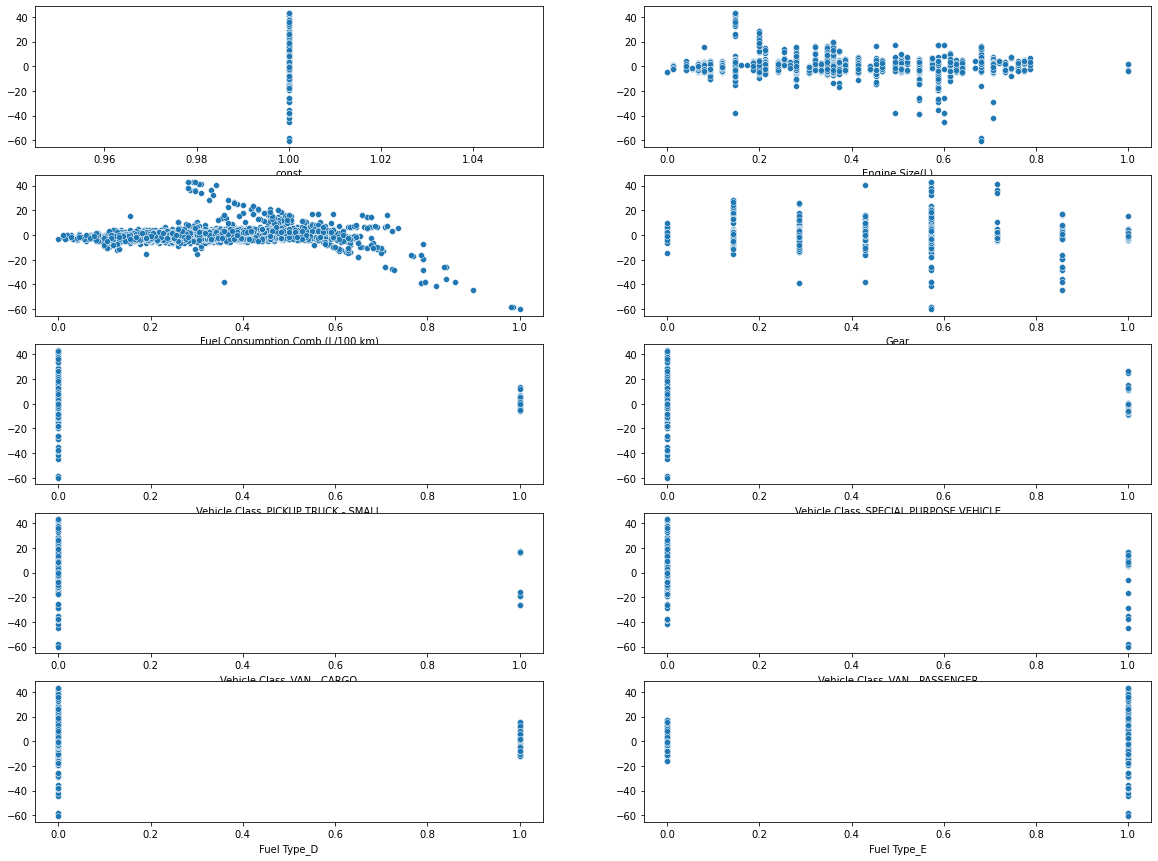

In [206]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train4d.columns, ax.flatten()):
    sns.scatterplot(X_train4d[variable], m4d.resid , ax=subplot)

# display the plot
plt.show()

### Normality of residuals:

In [207]:
stats.shapiro(m4d.resid)

ShapiroResult(statistic=0.7211316823959351, pvalue=0.0)

    The residuals are not normal. 
    This could be due to the nature of the dataset itself. 
    
    Note - Though not included in this flow, the effect of transforming the variables on the normality was also done. 
    But, it did not provide any significant results. 